<h2 style="text-align:center;">Exploring Dataset</h2>

1. [Loading Dataset](#loading-dataset)
2. [Data Overview](#overview)
3. [Feature Types](#feature-types)
4. [Checking For Missing Values](#missing-values)
5. [Checking For Negative Values](#negative-values)
6. [Checking For Duplicates](#duplicates)
7. [Checking For Outliers](#outliers)
8. [Data Distribution Analysis](#data-distribution)
9. [Visualizing Categorical Features](#categorical-features)
10. [Target Distribution with numerical features](#targetvsNumeric-distribution)
11. [Numerical Features Distribution](#numerical-distribution)
12. [Monthly Admissions by Day of Week](#monthly-admission)
13. [Features Before Selection](#before-selection)
14. [Features After Selection](#after-selection)
15. [Visualize Scaled Features](#scaled-features)
16. [Monthly Test Results](#monthly-results)
17. [Descriptive Statistics](#descriptive-stats)
18. [Test Results Distribution](#target-distribution)
19. [Correlation Matrix](#correlation)


<h2 id="loading-dataset">Loading Datasets</h2>

In [1]:
import os
import sys

# Detect project root by going up until we find the 'src' directory
current_dir = os.getcwd()
while not os.path.isdir(os.path.join(current_dir, 'src')):
    current_dir = os.path.dirname(current_dir)
    if current_dir == os.path.dirname(current_dir):  # Reached filesystem root
        raise FileNotFoundError("Could not find 'src' directory in any parent folders.")

# Set project root and add it to sys.path
PROJECT_ROOT = current_dir
print(f"Setting project root: {PROJECT_ROOT}")
os.chdir(PROJECT_ROOT)
sys.path.insert(0, PROJECT_ROOT)


from src.data import loader, preprocessor
from src.visualization import exploration_visualized


Setting project root: c:\Users\HP\Desktop\Healthcare_test_results_classification-


In [2]:
import os
import pandas as pd
from src.data import loader  # assuming you're already using this

# ✅ Define project root
project_root = r'C:\Users\HP\Desktop\Healthcare_test_results_classification-'
data_path = os.path.join(project_root, 'data', 'raw')

# ✅ Load raw train/test data
train_df, test_df = loader.load_data(
    train_path=os.path.join(data_path, 'train data.csv'),
    test_path=os.path.join(data_path, 'test data.csv')
)

# ✅ Load final selected feature data
selected_features_path = os.path.join(
    project_root,
    'data',
    'processed',
    'selected_features',
    'final_selected_by_vote.csv'
)

selected_df = pd.read_csv(selected_features_path)

# Optional: View first few rows
train_df.head()
selected_df.head()


,std_num__Age,std_num__Room Number,rob_num__Billing Amount,cat__Gender_Female,cat__Gender_Male,cat__Blood Type_A+,cat__Blood Type_A-,cat__Blood Type_AB+,cat__Blood Type_AB-,cat__Blood Type_B+,cat__Blood Type_B-,cat__Blood Type_O+,cat__Blood Type_O-,cat__Insurance Provider_Aetna,cat__Insurance Provider_Blue Cross,cat__Insurance Provider_Cigna,cat__Insurance Provider_Medicare,cat__Insurance Provider_UnitedHealthcare,target
0,-0.772600,0.872787,-0.507445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Normal
1,0.906636,-1.545561,-0.725449,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Inconclusive
2,-1.018342,-1.172808,-0.034368,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
3,1.848646,0.090916,0.690927,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Abnormal
4,0.251324,-0.163647,-0.622708,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Abnormal


<h2 id="overview">Data Overview</h2>

In [3]:
overview=data_overview=loader.get_data_overview(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  int64  
 3   Gender              50000 non-null  object 
 4   Blood Type          46935 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              49196 non-null  object 
 8   Hospital            49041 non-null  object 
 9   Insurance Provider  49707 non-null  object 
 10  Billing Amount      49276 non-null  float64
 11  Room Number         50000 non-null  int64  
 12  Admission Type      49819 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

<h2 id="feature-types">Feature Types</h2>

In [4]:
categorical_cols, numerical_cols = loader.classify_features(train_df, target_col="Test Results")



🔸 Found 11 categorical features (excluding target 'Test Results'):
['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication']

🔹 Found 4 numerical features:
['ID', 'Age', 'Billing Amount', 'Room Number']


<h2 id="missing-values">Checking For Missing Values</h2>

                    Missing Values  Missing Percentage (%)
Blood Type                    3065                   6.130
Hospital                       959                   1.918
Doctor                         804                   1.608
Billing Amount                 724                   1.448
Insurance Provider             293                   0.586
Admission Type                 181                   0.362


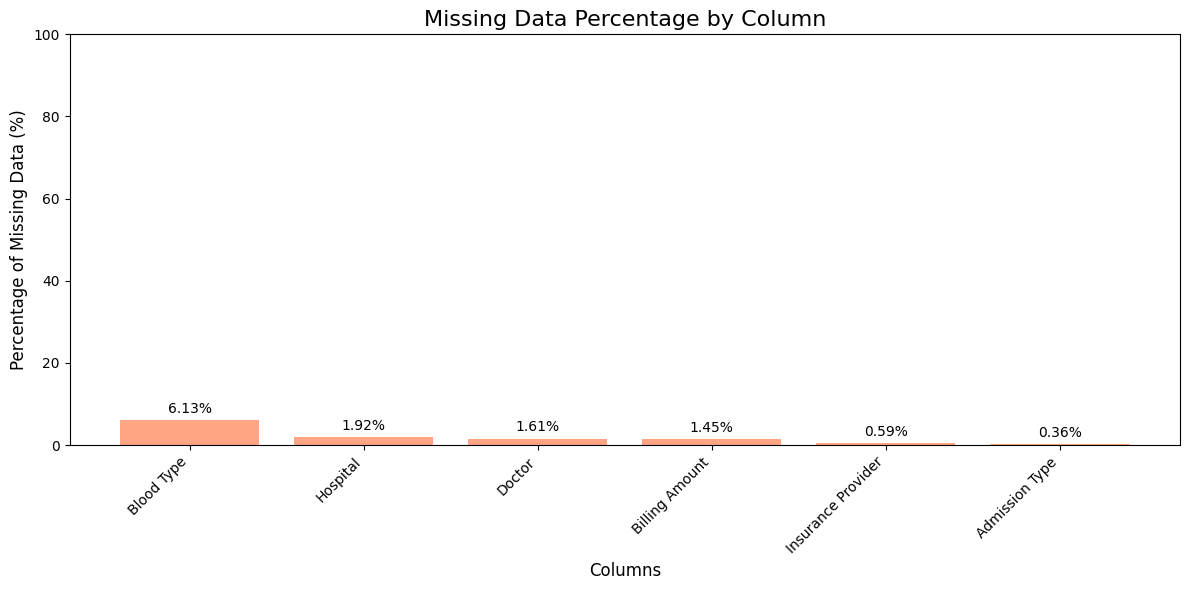

In [5]:
missing_values=preprocessor.analyze_missing_values(train_df)
print(missing_values)
exploration_visualized.analyze_and_plot_missing_values(train_df)


In [6]:
# missing_values2=preprocessor.analyze_missing_values(selected_df)
# print(missing_values2)
# exploration_visualized.analyze_and_plot_missing_values(selected_df)

<h2 id="negative-values">Checking for negative values</h2>

🔎 Checking for negative values in numerical columns...

❌ Column 'Billing Amount' has 247 negative value(s).


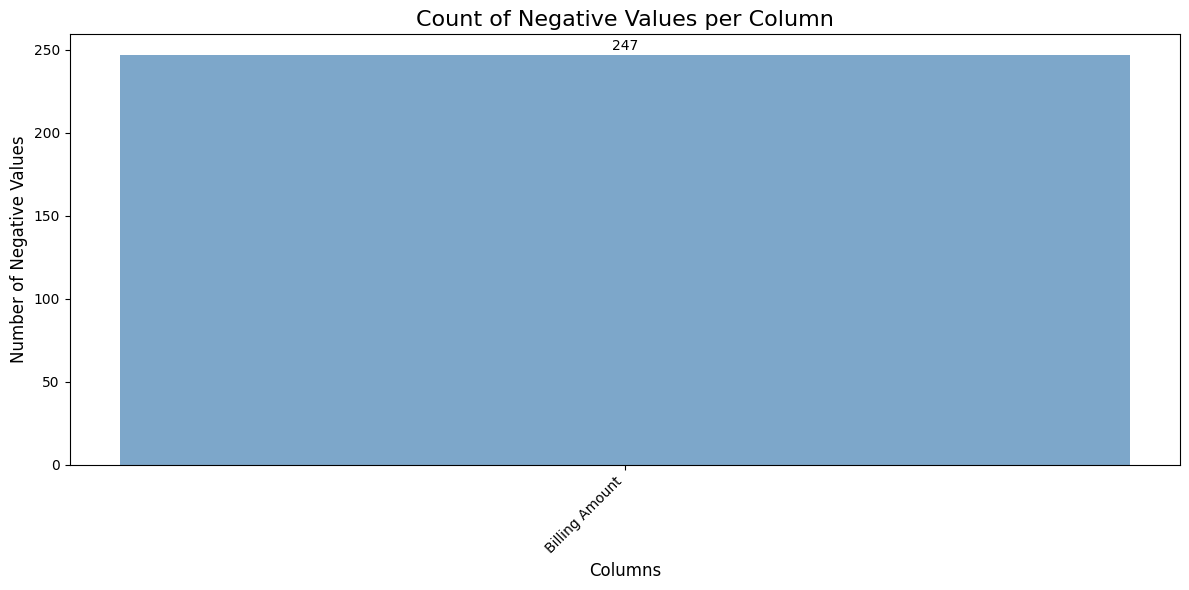

In [7]:
preprocessor.check_negative_values(train_df)

exploration_visualized.plot_negative_values(train_df)

<h2 id="duplicates">Checking For Duplicates</h2>

In [8]:
exploration_visualized.plot_duplicates(train_df)

Duplicated rows: 0



np.int64(0)

<h2 id="outliers">Checking For Outliers</h2>

{'ID': np.int64(0), 'Age': np.int64(0), 'Billing Amount': np.int64(0), 'Room Number': np.int64(0)}


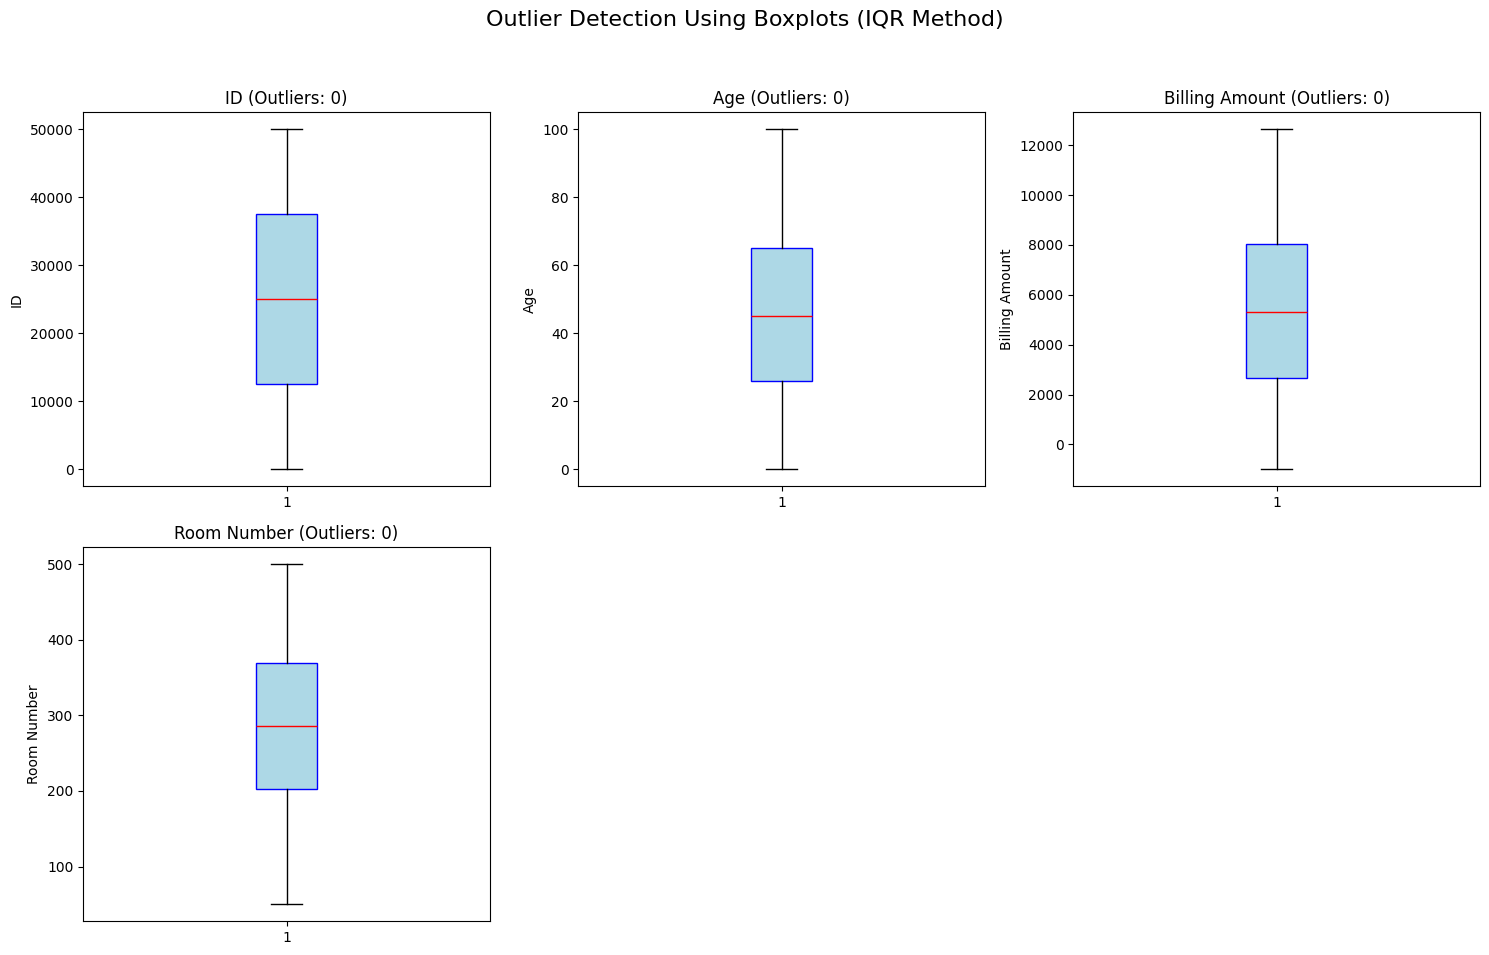

❌ No outliers found in any numeric column.


In [9]:

outliers, summary = preprocessor.detect_outliers(train_df, method='iqr', return_summary=True)
print(summary)

exploration_visualized.plot_outliers_all_boxplot(train_df)

<h2>After Feature Selection</h2>

In [10]:

# outliers, summary = preprocessor.detect_outliers(selected_df, method='iqr', return_summary=True)
# print(summary)
# outliers


In [11]:
# exploration_visualized.plot_outliers_all(selected_df)

<h2 id="data-distribution">Data Distribution Analysis</h2>

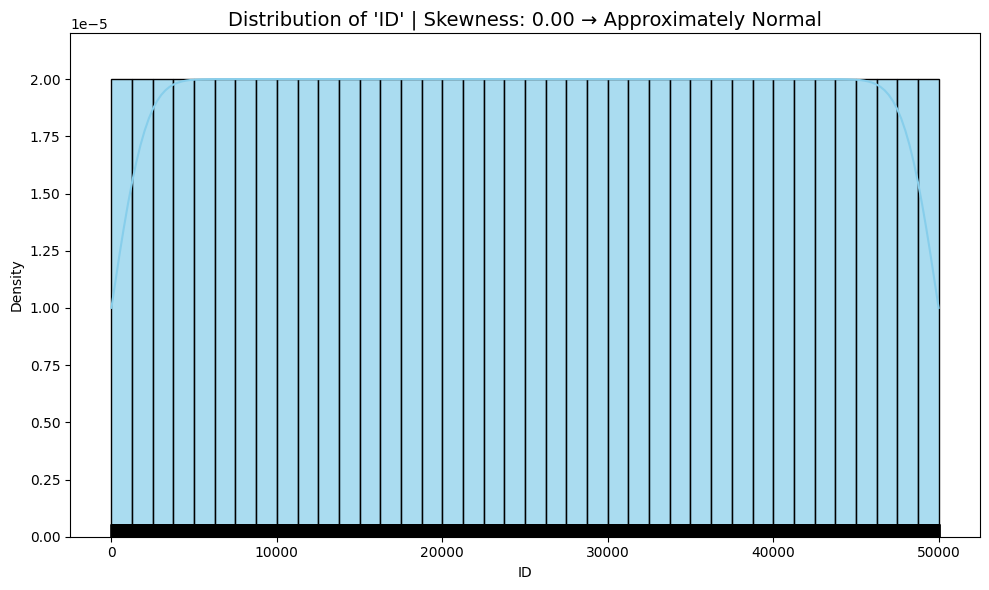

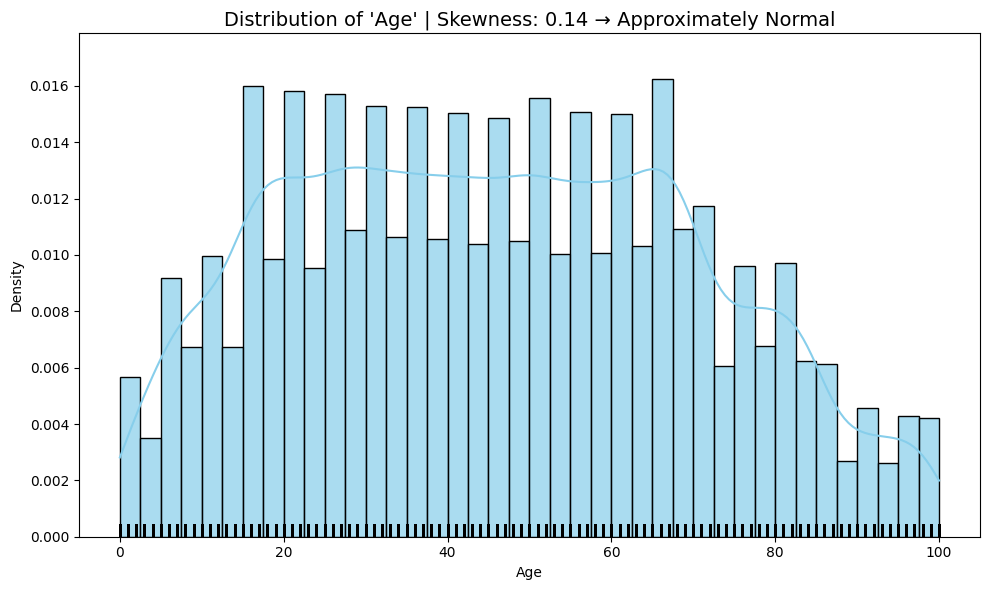

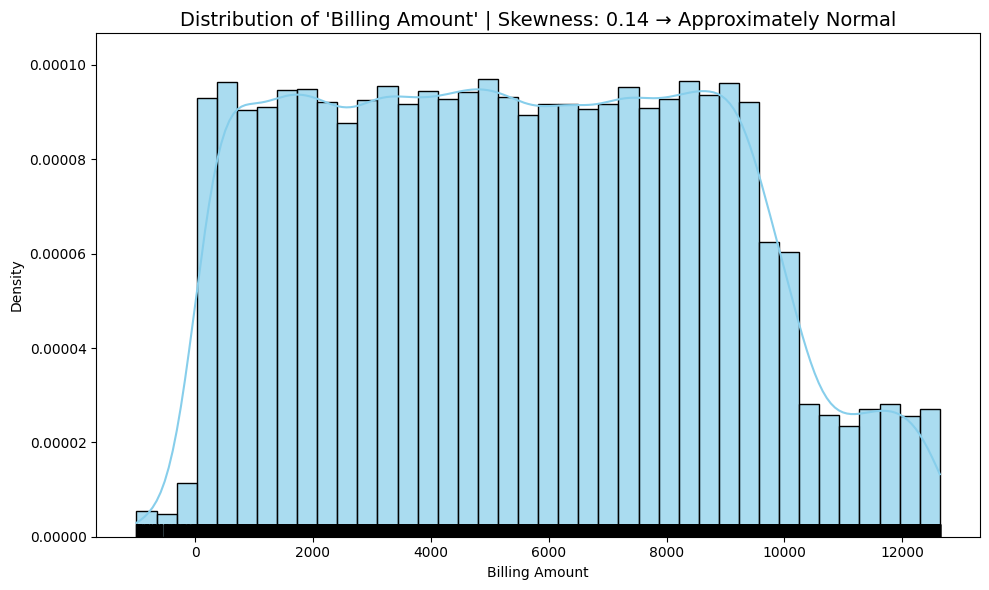

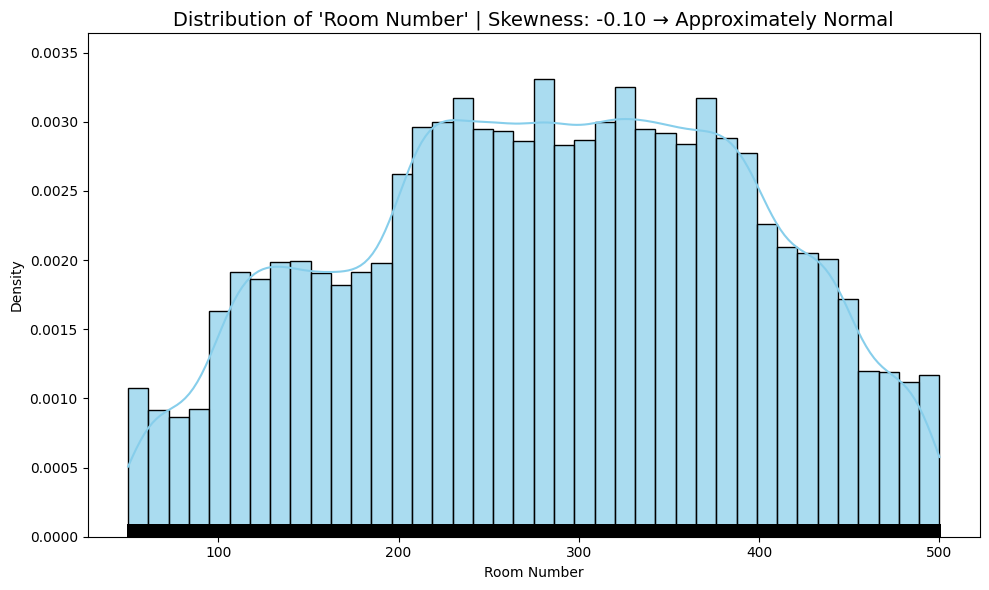

In [12]:
exploration_visualized.plot_distribution_analysis(train_df)

<h2 id="categorical-features">Visualizing categorical features realtions with target</h2>

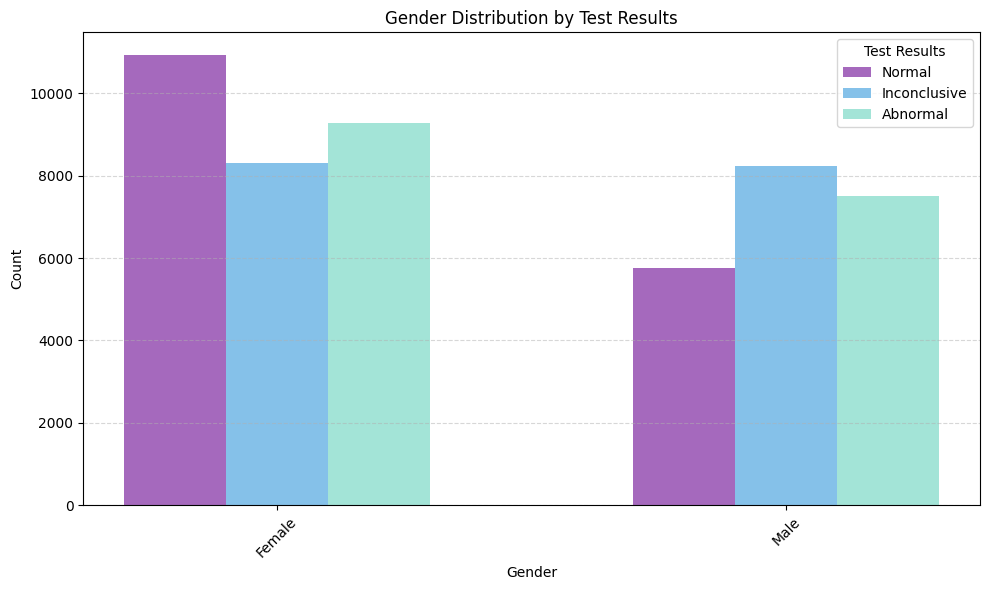

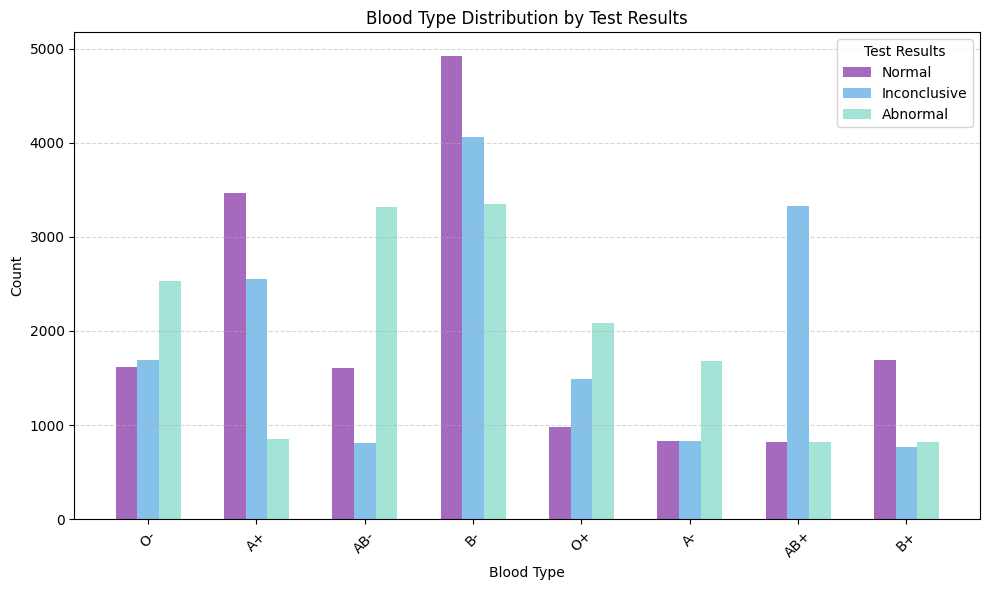

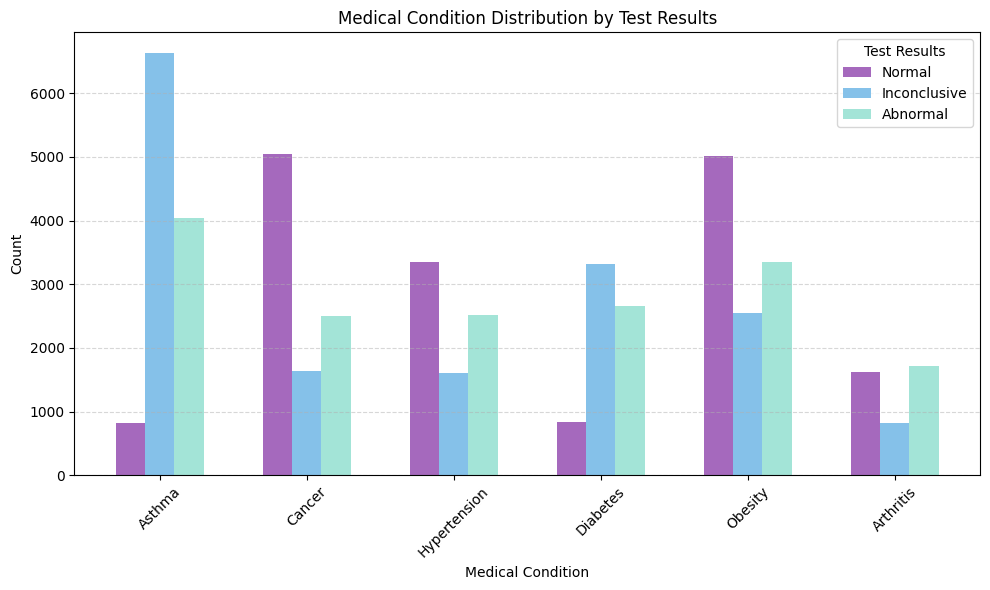

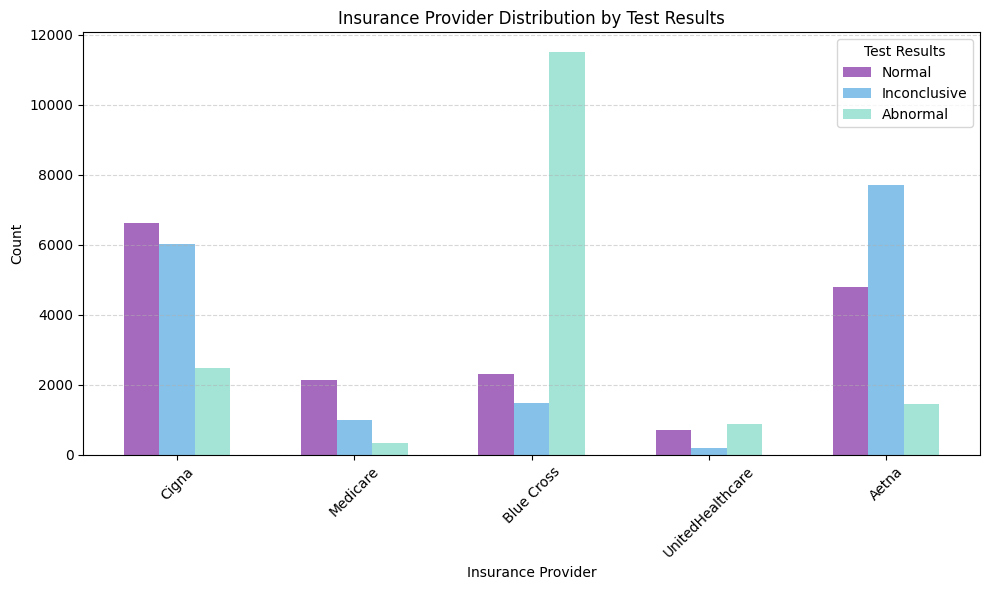

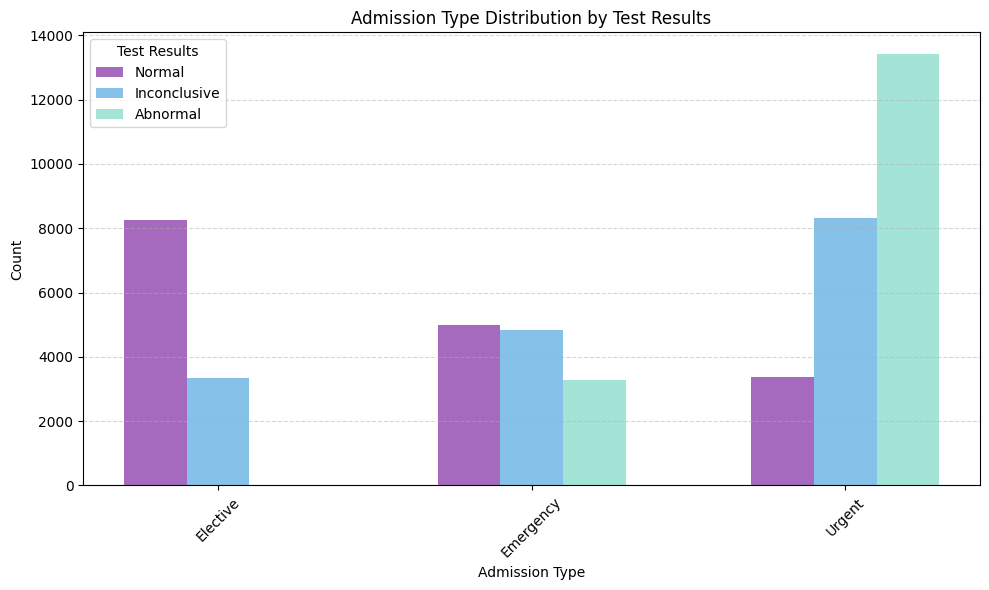

In [13]:
cat_cols = preprocessor.get_plotable_categorical_features(train_df, target_col="Test Results")
figs = exploration_visualized.plot_categorical_by_target(train_df, cat_cols, target_col="Test Results")



<h2 id="targetvsNumeric-distribution">Target Distribution with numerical features</h2>

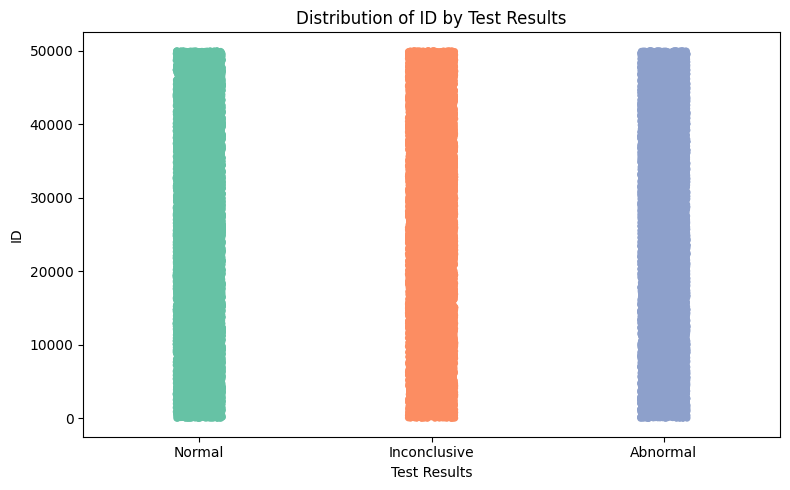

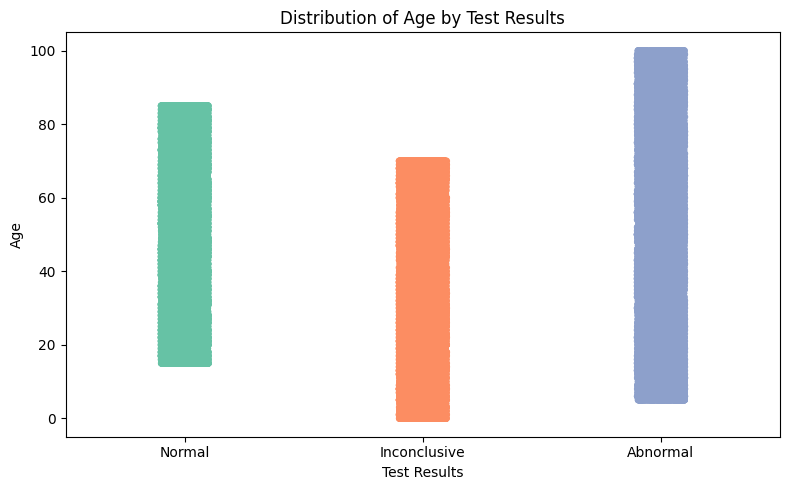

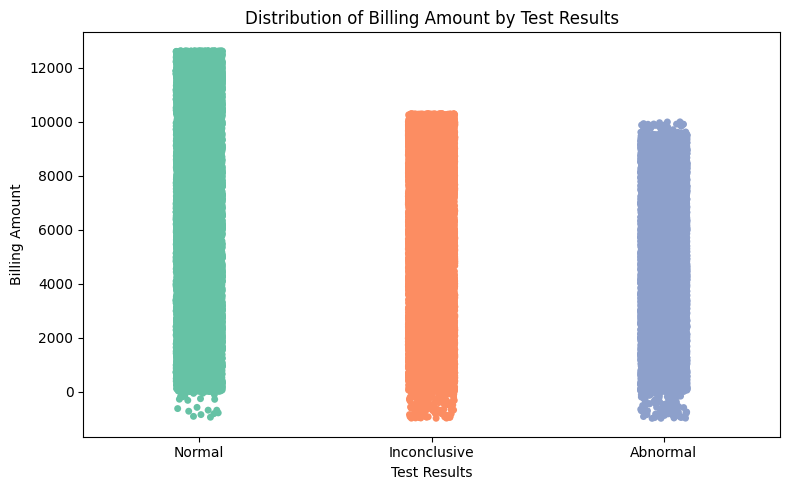

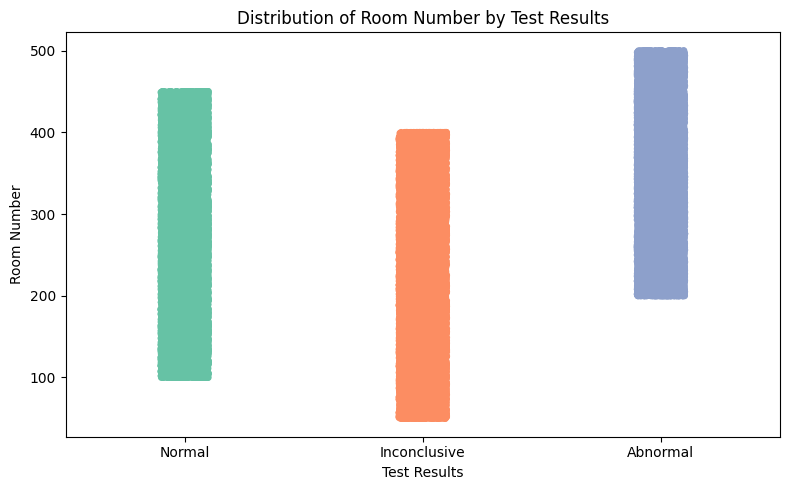

In [14]:
exploration_visualized.plot_numerical_vs_target_scatter(train_df, numerical_cols, target_col='Test Results')

<h2>Numerical Features Distribution</h2>

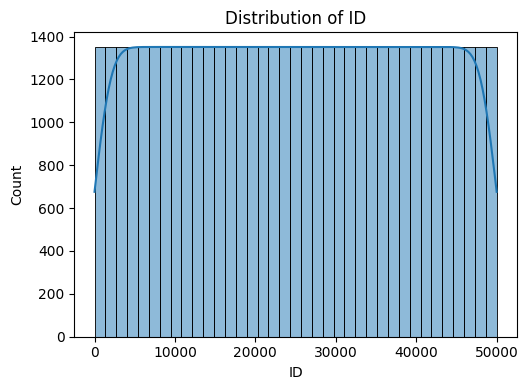

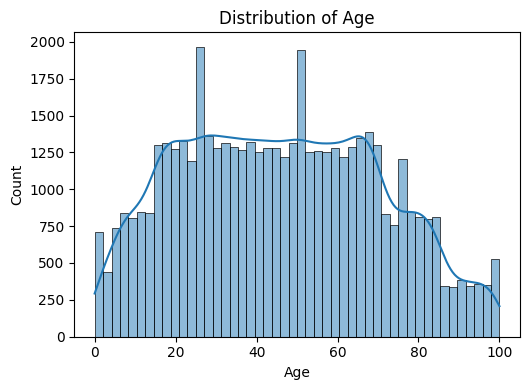

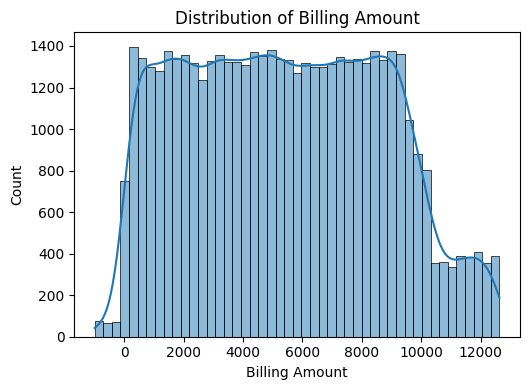

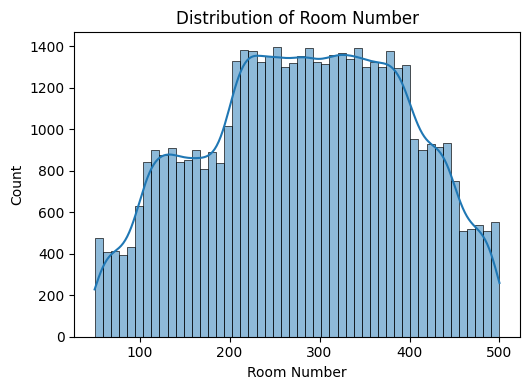

In [15]:
exploration_visualized.plot_numerical_distributions(train_df, numerical_cols)

<h2 id="monthly-admission">Monthly Admissions by Day of Week</h2>

c:\Users\HP\Desktop\Healthcare_test_results_classification-\src\visualization\exploration_visualized.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date of Admission'].dt.strftime('%b')  # e.g., Jan, Feb
c:\Users\HP\Desktop\Healthcare_test_results_classification-\src\visualization\exploration_visualized.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Date of Admission'].dt.day_name()  # e.g., Monday


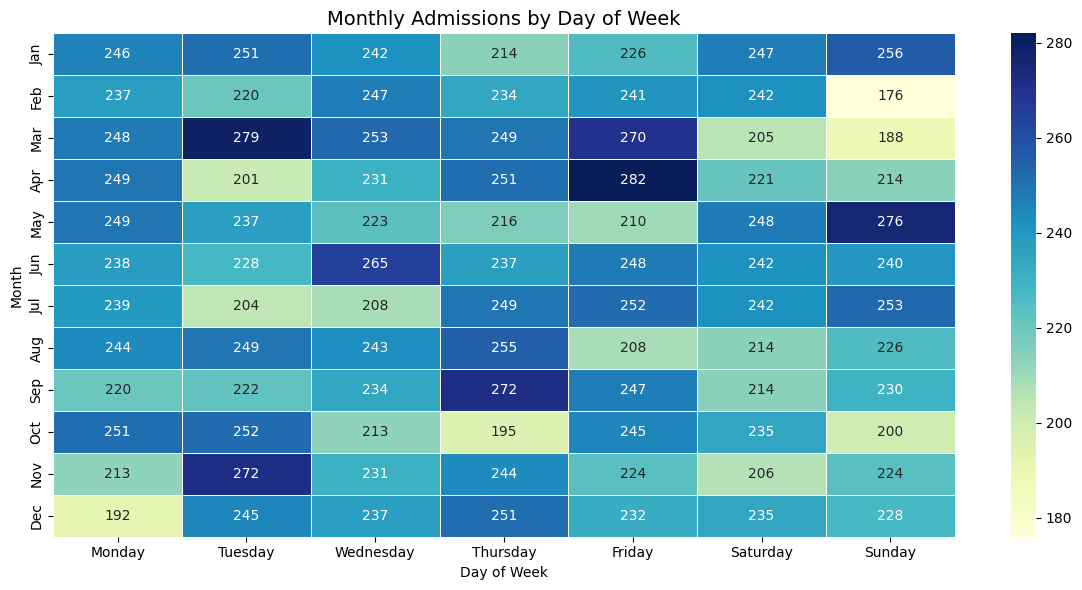

In [16]:
exploration_visualized.plot_admissions_heatmap(train_df)

<h2 id="before-selection">Features before selection</h2>

In [17]:
preprocessor.get_original_features(train_df, label_column='Test Results')


Original Features:
      Feature Name
                ID
              Name
               Age
            Gender
        Blood Type
 Medical Condition
 Date of Admission
            Doctor
          Hospital
Insurance Provider
    Billing Amount
       Room Number
    Admission Type
    Discharge Date
        Medication


<h2 id="after-selection">Features After Selection</h2>

In [18]:
selected_features=pd.read_csv('data/processed/selected_features/final_selected_by_vote.csv')
preprocessor.get_selected_features(selected_features)


Selected Features:
                            Feature Name
                            std_num__Age
                    std_num__Room Number
                 rob_num__Billing Amount
                      cat__Gender_Female
                        cat__Gender_Male
                      cat__Blood Type_A+
                      cat__Blood Type_A-
                     cat__Blood Type_AB+
                     cat__Blood Type_AB-
                      cat__Blood Type_B+
                      cat__Blood Type_B-
                      cat__Blood Type_O+
                      cat__Blood Type_O-
           cat__Insurance Provider_Aetna
      cat__Insurance Provider_Blue Cross
           cat__Insurance Provider_Cigna
        cat__Insurance Provider_Medicare
cat__Insurance Provider_UnitedHealthcare
                                  target


<h2 id="scaled-features">Visualize Scaled Feature Distributions</h2>

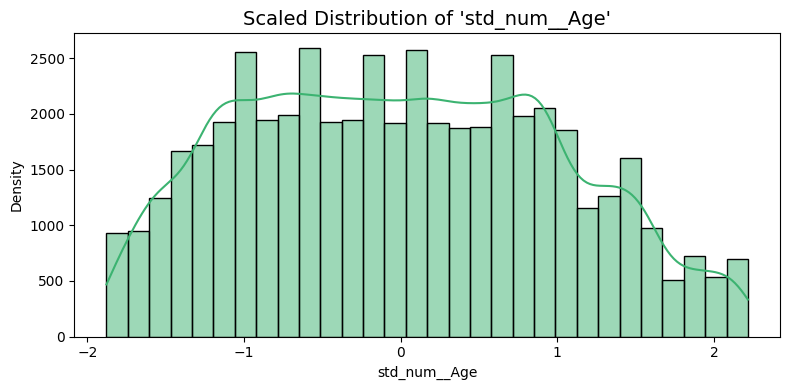

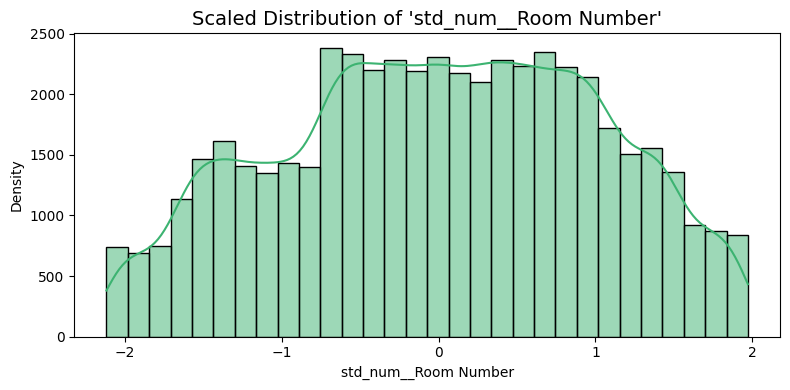

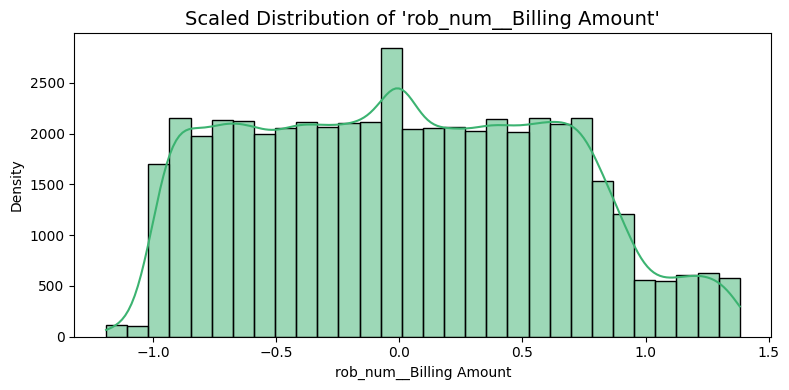

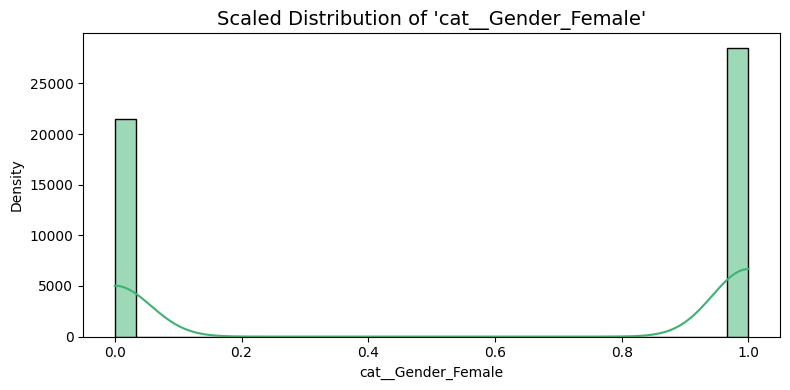

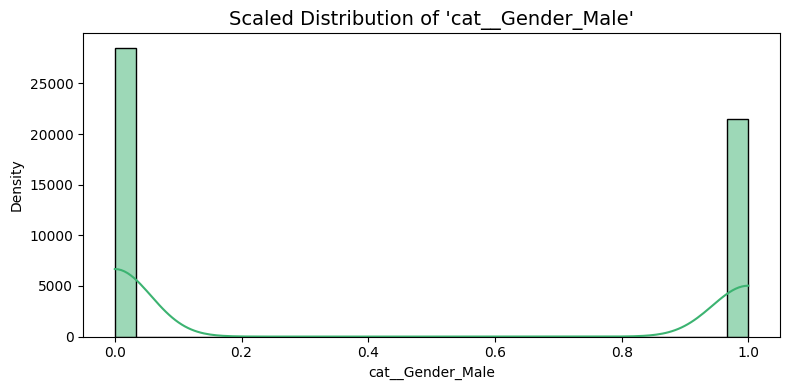

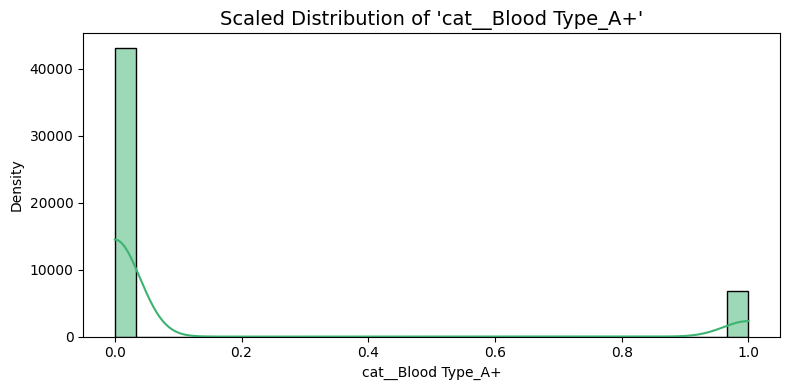

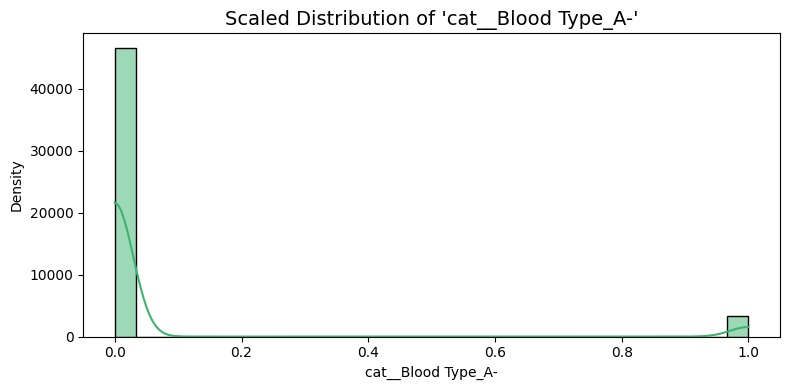

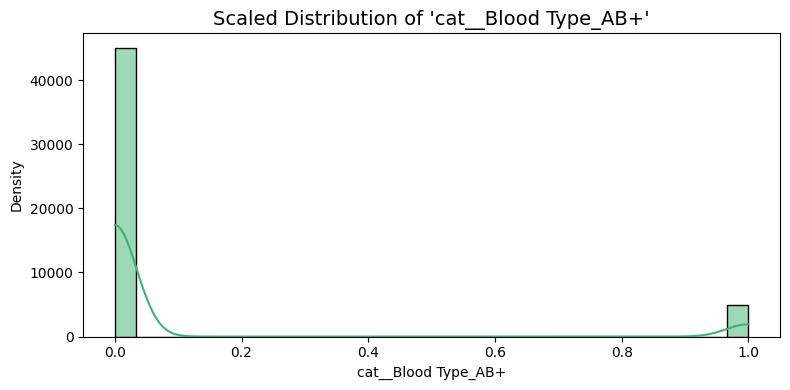

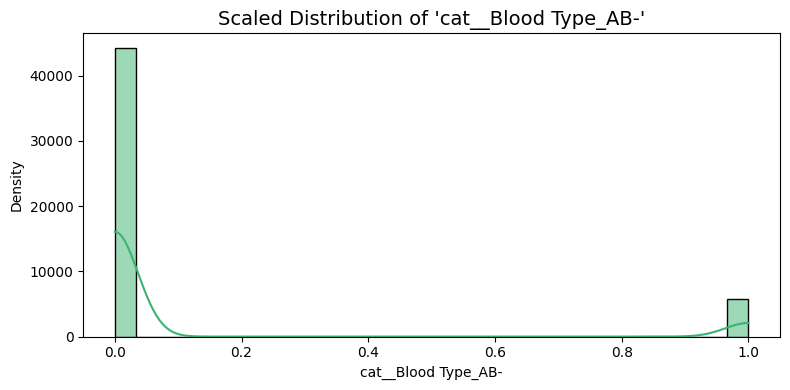

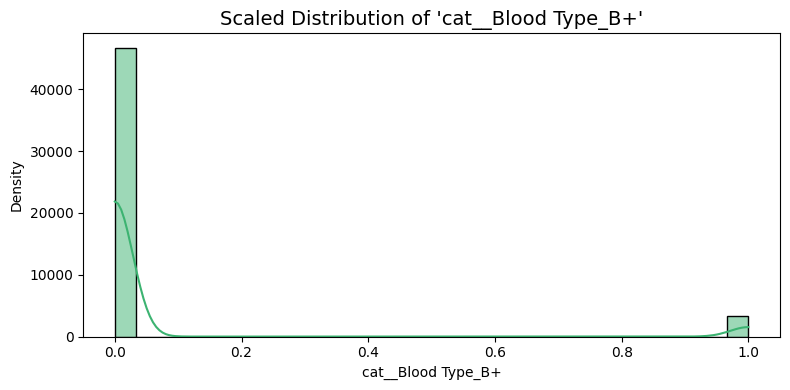

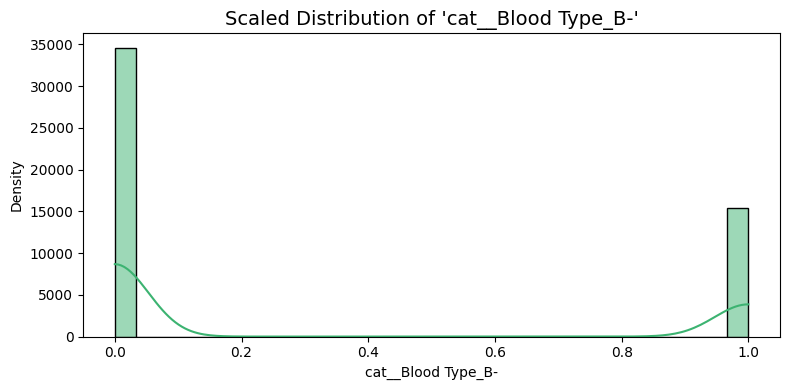

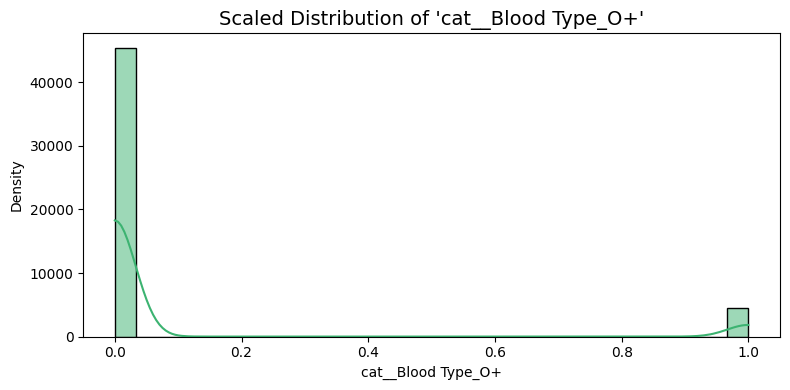

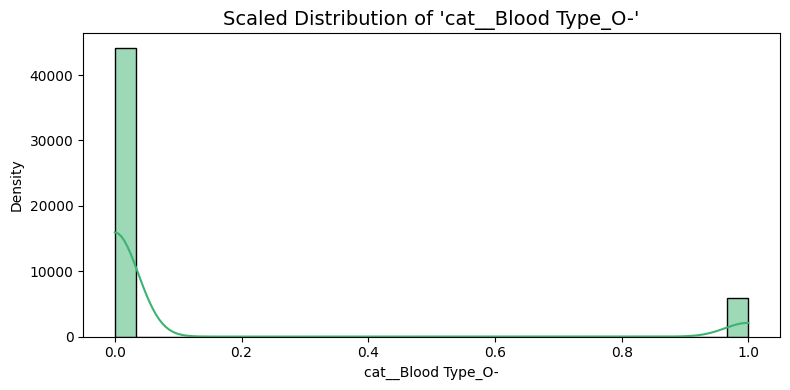

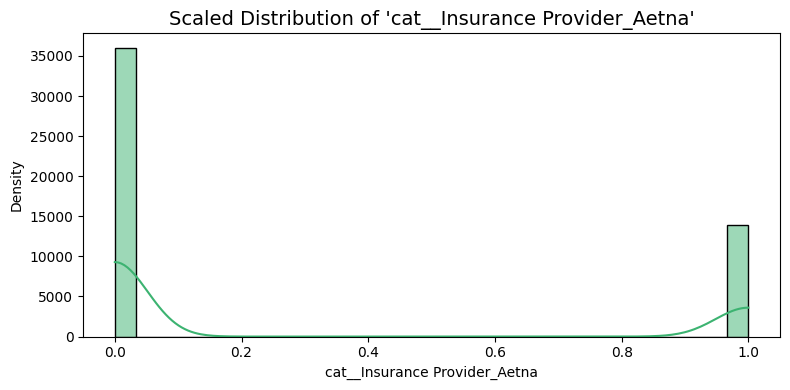

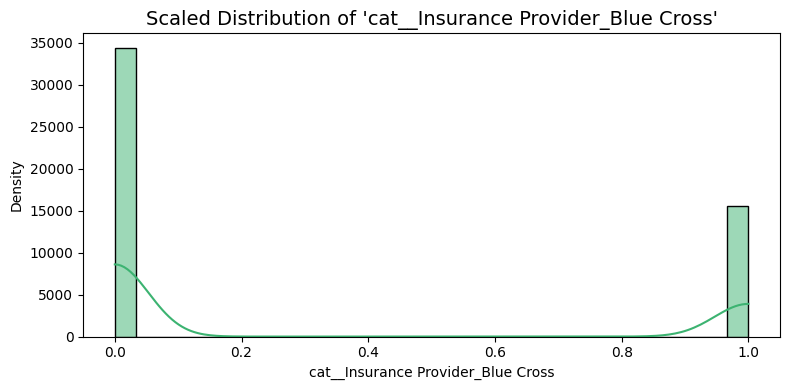

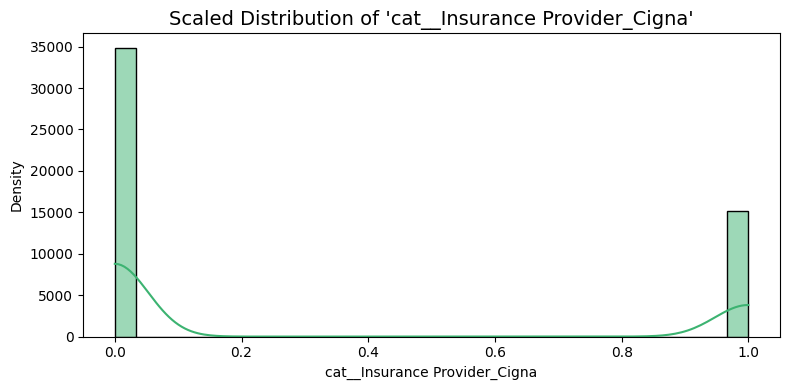

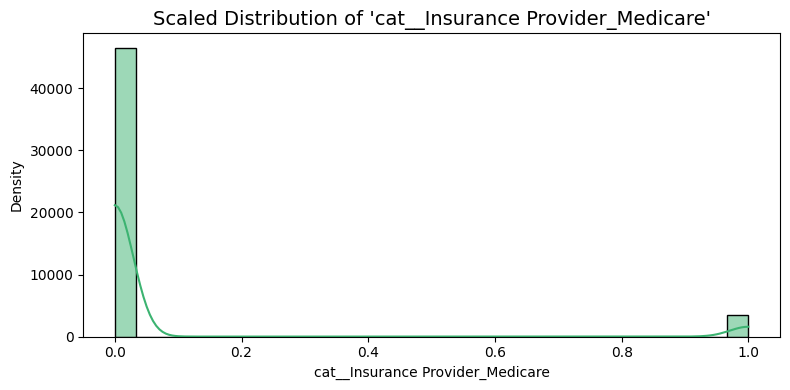

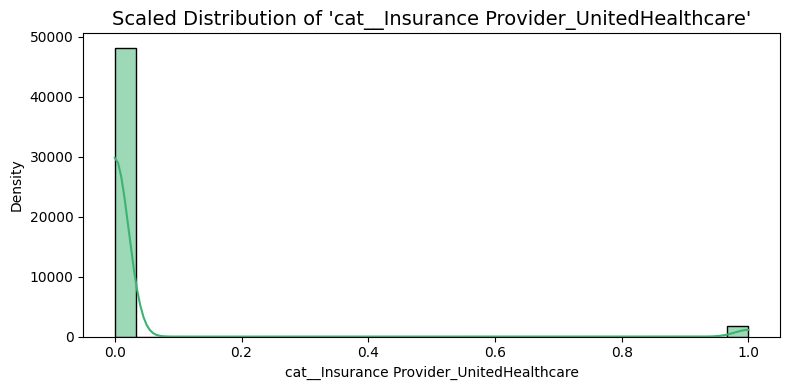

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Use absolute path from project root
file_path = "data/processed/processed_scaled_data.csv"
save_path = "reports/scaled_feature_plots"

# ✅ Load dataset
scaled_df = pd.read_csv(file_path)

# 🎯 Drop target column if it exists
if 'target' in scaled_df.columns:
    scaled_features = scaled_df.drop(columns=['target'])
else:
    scaled_features = scaled_df.copy()

# 📂 Create output folder if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# 🔁 Plot and save each feature
for col in scaled_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(scaled_features[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f"Scaled Distribution of '{col}'", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(f"{save_path}/{col}_scaled_dist.png")
    plt.show()


<h2 id="monthly-results">Monthly Test Results Trend</h2>

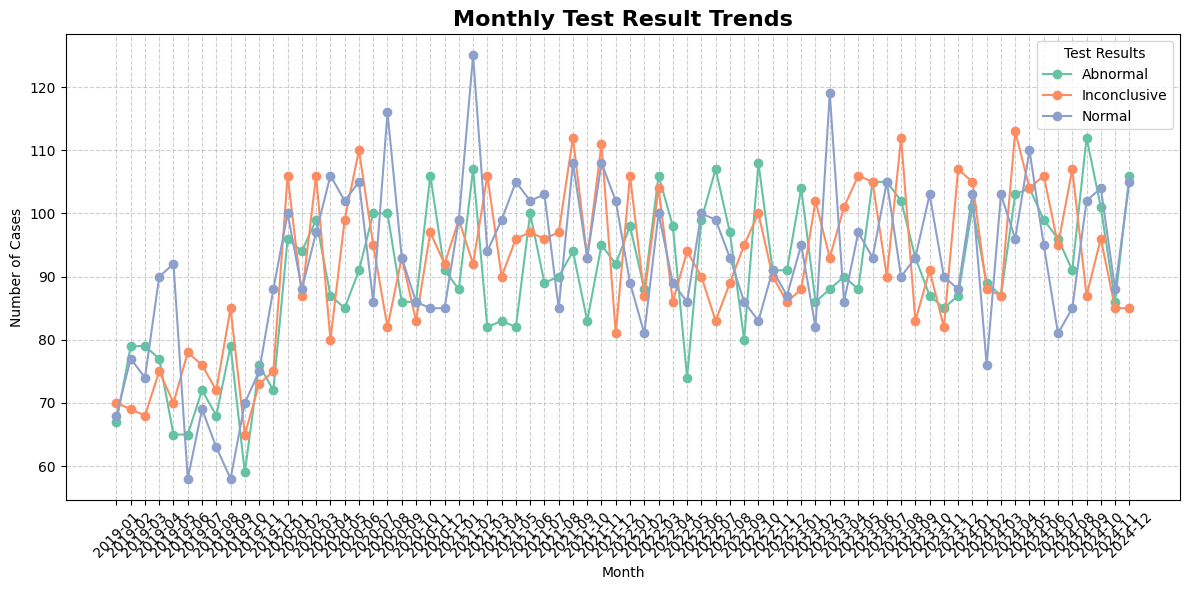

In [20]:

monthly_data = preprocessor.get_monthly_test_result_counts(train_df)

fig = exploration_visualized.plot_monthly_test_result_trends(monthly_data)


<h2>Statistical Analysis</h2>

<h2 id="descriptive-stats">Descriptive Statistics</h2>

In [21]:
preprocessor.compute_descriptive_statistics(train_df)

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month
count,50000.000000,50000,50000.000000,50000,46935,50000,19727,49196,49041,49707,49276.000000,50000.000000,49819,50000,50000,50000,19727
unique,NaN,49992,NaN,2,8,6,NaN,217,60,5,NaN,NaN,3,2190,5,3,72
top,NaN,TInA white,NaN,Female,B-,Asthma,NaN,Angela Contreras,Houston PLC,Blue Cross,NaN,NaN,Urgent,09/08/2019,Penicillin,Abnormal,2021-02
freq,NaN,2,NaN,28514,12338,11485,NaN,585,2164,15295,NaN,NaN,25117,41,12258,16772,324
mean,25000.500000,NaN,45.863700,NaN,NaN,NaN,2022-01-28 20:11:53.174836480,NaN,NaN,NaN,5397.314987,282.999980,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,2019-01-05 00:00:00,NaN,NaN,NaN,-995.211704,50.000000,NaN,NaN,NaN,NaN,NaN
25%,12500.750000,NaN,26.000000,NaN,NaN,NaN,2020-08-12 00:00:00,NaN,NaN,NaN,2645.811489,203.000000,NaN,NaN,NaN,NaN,NaN
50%,25000.500000,NaN,45.000000,NaN,NaN,NaN,2022-02-04 00:00:00,NaN,NaN,NaN,5313.507889,286.000000,NaN,NaN,NaN,NaN,NaN
75%,37500.250000,NaN,65.000000,NaN,NaN,NaN,2023-07-10 00:00:00,NaN,NaN,NaN,8027.205893,370.000000,NaN,NaN,NaN,NaN,NaN
max,50000.000000,NaN,100.000000,NaN,NaN,NaN,2024-12-12 00:00:00,NaN,NaN,NaN,12635.764460,500.000000,NaN,NaN,NaN,NaN,NaN


<h2 id="target-distribution">Visualizing the Test Results Distribution</h2>

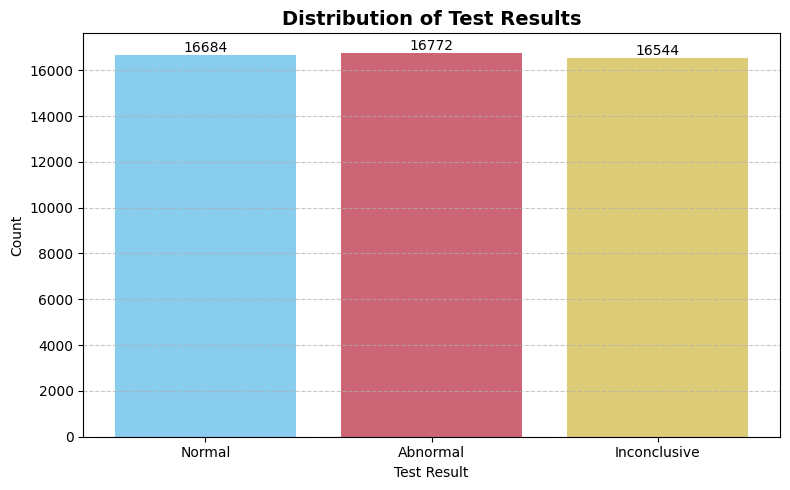

In [22]:

exploration_visualized.plot_test_result_distribution(train_df, target_col="Test Results")

<h2 id="correlation">Correlation Matrix</h2>

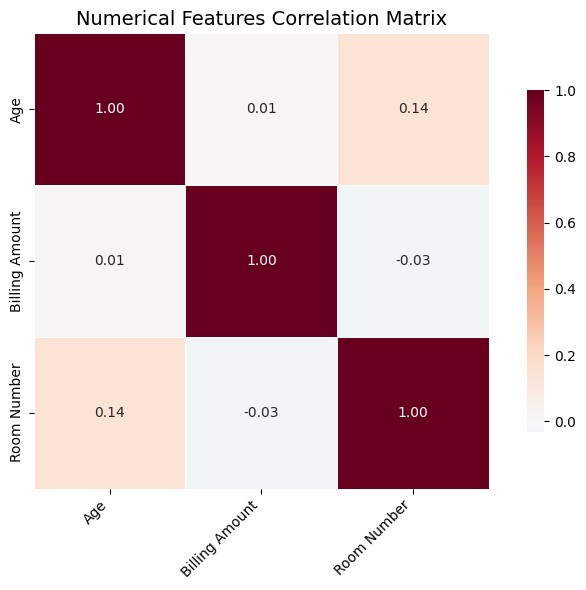

In [23]:
numerical_cols=preprocessor.get_numerical_features(train_df)
exploration_visualized.plot_correlation_matrix(train_df,numerical_cols)